# Расчет RWA

In [3]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pylab as plt

Сounterparties

In [8]:
d = pd.DataFrame()
d['nominal'] = [100, 17000, 1000, 300000, 670, 2300, 8000]
d['cnt'] = [10, 35, 400, 1, 300, 100, 164]
d['rating'] = [24, 15, 12, 9, 18, 15, 11]
d

,nominal,cnt,rating
0,100,10,24
1,17000,35,15
2,1000,400,12
3,300000,1,9
4,670,300,18
5,2300,100,15
6,8000,164,11


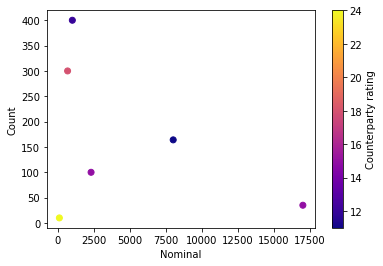

In [27]:
tmp = d[d['nominal'] < 300000]

cm = plt.cm.get_cmap('plasma')
plt.scatter(tmp['nominal'], tmp['cnt'], c=tmp['rating'], cmap=cm)
plt.colorbar( label='Сounterparty rating')
plt.ylabel('Count')
plt.xlabel('Nominal')
plt.show()

Sum by nominal

In [21]:
d['sum'] = d['nominal'] * d['cnt']
d

,nominal,cnt,rating,sum
0,100,10,24,1000
1,17000,35,15,595000
2,1000,400,12,400000
3,300000,1,9,300000
4,670,300,18,201000
5,2300,100,15,230000
6,8000,164,11,1312000


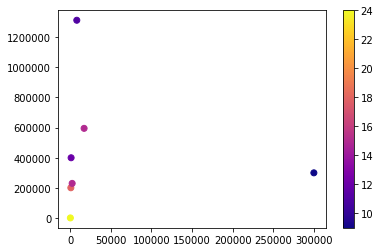

In [25]:
plt.scatter(d['nominal'], d['sum'], c=d['rating'], cmap=cm)
plt.colorbar()
plt.show()

Sorting sums by nominal

In [23]:
tmp = d[['nominal', 'sum', 'rating']].sort_values('nominal')
tmp

,nominal,sum,rating
0,100,1000,24
4,670,201000,18
2,1000,400000,12
5,2300,230000,15
6,8000,1312000,11
1,17000,595000,15
3,300000,300000,9


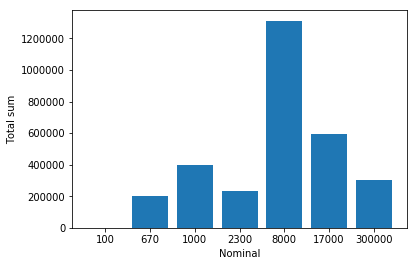

In [26]:
tick_label = tmp['nominal'].astype(str).tolist()
plt.bar(list(range(len(tmp))), tmp['sum'], tick_label=tick_label)
plt.ylabel('Total sum')
plt.xlabel('Nominal')
plt.show()

In [30]:
# plt.scatter(tmp['sum'], tmp['nominal'])
# plt.bar( label='Сounterparty rating')
# plt.ylabel('Count')
# plt.xlabel('Nominal')
# plt.show()

import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=tmp['sum'],
    y=tmp['sum'],
#     width = [0.8, 0.8, 0.8, 3.5, 4]
)

data = [trace0]

fig = go.Figure(data=data)
py.iplot(fig, filename='width-bar')

ModuleNotFoundError: No module named 'plotly'